In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("filtered_reddit_posts.csv")

df.head()


,id,timestamp,subreddit,cleaned_text,upvotes,comments,url
0,doqwow,1.572361e+09,depression,mostbroken leastunderstood rules helpers may i...,2358,177,https://www.reddit.com/r/depression/comments/d...
1,1l8aex1,1.749590e+09,depression,really want hang year ago came realization mus...,67,28,https://www.reddit.com/r/depression/comments/1...
2,1l87zop,1.749584e+09,depression,alive sucks listen many sad songs many suicida...,48,5,https://www.reddit.com/r/depression/comments/1...
3,1l8gr88,1.749607e+09,depression,dont even know im lonely idk whats wrong whole...,13,3,https://www.reddit.com/r/depression/comments/1...
4,1l8a4re,1.749589e+09,depression,hate depressed hate depressed life live nice t...,30,8,https://www.reddit.com/r/depression/comments/1...


In [7]:
# 1. Basic overview of the dataset
print(df.info())           # Check data types and missing values
print(df.describe())       # Get summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            517 non-null    object 
 1   timestamp     517 non-null    float64
 2   subreddit     517 non-null    object 
 3   cleaned_text  517 non-null    object 
 4   upvotes       517 non-null    int64  
 5   comments      517 non-null    int64  
 6   url           517 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 28.4+ KB
None
          timestamp      upvotes    comments
count  5.170000e+02   517.000000  517.000000
mean   1.739552e+09    23.667311    6.851064
std    3.183666e+07   162.129379   25.223556
min    1.521349e+09     0.000000    0.000000
25%    1.749063e+09     1.000000    1.000000
50%    1.749530e+09     2.000000    2.000000
75%    1.749597e+09     6.000000    5.000000
max    1.749624e+09  2358.000000  422.000000


Start date: 2018-03-18 04:57:56
End date: 2025-06-11 06:32:06


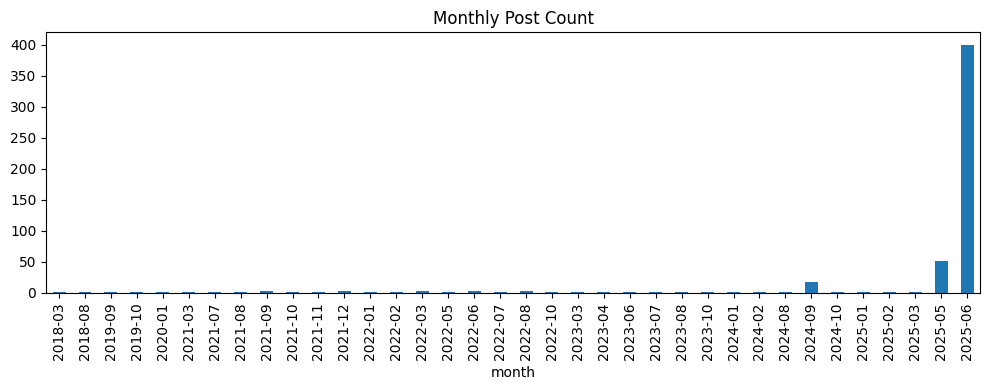

In [8]:
# 2. Analyze timestamp range and convert to readable datetime format
df['date'] = pd.to_datetime(df['timestamp'], unit='s')  # Convert Unix timestamp to datetime
print(f"Start date: {df['date'].min()}")                # Earliest post
print(f"End date: {df['date'].max()}")       

# Plot the number of posts per month
df['month'] = df['date'].dt.to_period('M')              # Extract year-month period
df['month'].value_counts().sort_index().plot(
    kind='bar', figsize=(10,4), title='Monthly Post Count'
)
plt.tight_layout()
plt.show()           # Latest post

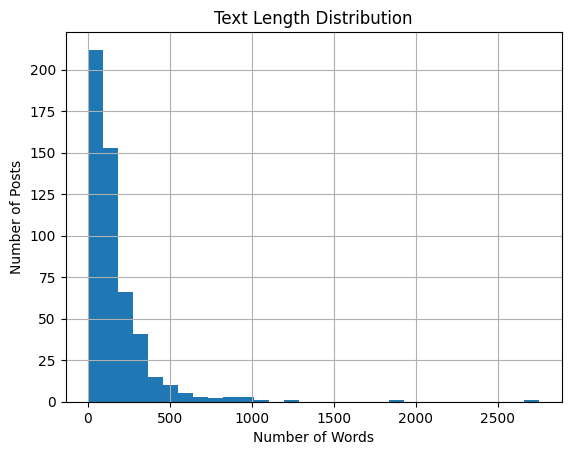

In [9]:
# 3. Analyze text length (number of words in each post)
df['text_length'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))  # Count words
df['text_length'].hist(bins=30)                                              # Histogram
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Posts")
plt.show()

In [10]:
# 4. Analyze distribution of upvotes and comments
print(df[['upvotes', 'comments']].describe())  # Summary stats for engagement metrics

           upvotes    comments
count   517.000000  517.000000
mean     23.667311    6.851064
std     162.129379   25.223556
min       0.000000    0.000000
25%       1.000000    1.000000
50%       2.000000    2.000000
75%       6.000000    5.000000
max    2358.000000  422.000000
